<a href="https://colab.research.google.com/github/BeverlyHuang/customer_churn/blob/master/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Churn Prediction

##Framework

![](https://raw.githubusercontent.com/BeverlyHuang/heart_disease/master/ds_process_model.png)

#Business Understanding

* Predicting customer churn based on available communication records
* Enabling the company to take actions to retain customers

#Data Understanding

* Data Sources: https://www.kaggle.com/c/customer-churn-prediction/data
* Features: Number of messages, calls, total minutes, charges, etc.

#Data Preparation

##Ingestion

###Import Packages

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix, ROCAUC

import warnings
warnings.filterwarnings("ignore")

###Load Data

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/BeverlyHuang/customer_churn/master/churn_train.txt", delimiter=',')
df.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar ncsc,label
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [0]:
list(df.columns.values)

['st',
 ' acclen',
 ' arcode',
 ' phnum',
 ' intplan',
 ' voice',
 'nummailmes',
 ' tdmin',
 ' tdcal',
 ' tdchar',
 ' temin',
 ' tecal',
 ' tecahr',
 ' tnmin',
 ' tn cal',
 ' tnchar',
 ' timin',
 ' tical',
 ' tichar ncsc',
 ' label']

###Clean Data

#### *Variables Needs*

number vmail messages: continuous.

total day minutes: continuous.

total day calls: continuous.

total day charge: continuous.

total eve minutes: continuous.

total eve calls: continuous.

total eve charge: continuous.

total night minutes: continuous.

total night calls: continuous.

total night charge: continuous.

total intl minutes: continuous.

total intl calls: continuous.

total intl charge: continuous.

number customer service calls: continuous.

label: True/False

In [0]:
df = df.drop(['st',' acclen',' arcode',' phnum',' intplan'], axis=1)
df[' label'] = df[' label'].apply(lambda x: 1 if x==" True." else 0)
df.head()

,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar ncsc,label
KS,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
OH,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
NJ,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
OH,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
OK,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


#Modeling & Evaluation

###Seperate features and target

In [0]:
X=df.drop([' label'], axis=1)
y=df[' label']

###Train/Test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

##Model 1: Logistics Regression

###Default model result

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_test,y_test)

0.857

### Set up hyperparameter grid

In [0]:
c_space = np.logspace(-5,8,15)
param_grid = {'C': c_space}

### GridSearch for best parameters

In [0]:
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=10)
logreg_cv.fit(X_train,y_train)
logreg_cv.best_params_

{'C': 2275.845926074791}

###Use the best parameters to predict

In [0]:
y_pred = logreg_cv.predict(X_test)
logreg_cv.score(X_test,y_test)

0.86

###Confusion matrix

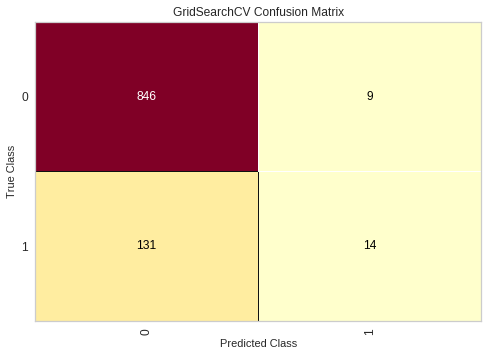

In [0]:
cm = ConfusionMatrix(logreg_cv, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

###Classfication report

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       855
           1       0.61      0.10      0.17       145

   micro avg       0.86      0.86      0.86      1000
   macro avg       0.74      0.54      0.55      1000
weighted avg       0.83      0.86      0.81      1000



###ROC AUC

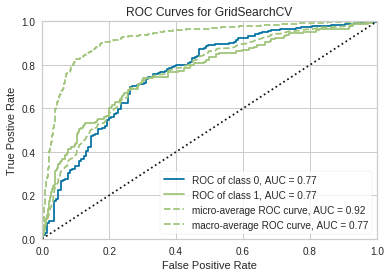

In [0]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(logreg_cv)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

###Performance Interpretation 

* Using logistics regression, the best model achieves 86% accuracy.
* False positives (type I error) means the customer did not churn while our predicted result indicates that the customer would churn. False negatives (type II error) means the customer churned while our predicted result indicates that the customer would not churn.
* In this case, false negatives are more serious because we fail to identify churning customers. So we want to minimize false negatives, i.e. maximize recall (Σ True positive/Σ Condition positive).
* Here, recall =  0.1. The model can identify 10% churning customers correctly. This result is very bad.

##Model 2: SVM

###Default model result

In [0]:
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm.score(X_test,y_test)

0.855

### Set up hyperparameter grid

In [0]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

### GridSearch for best parameters

In [0]:
svm = SVC(kernel='rbf')
svm_cv = GridSearchCV(svm, param_grid, cv=10)
svm_cv.fit(X, y)
svm_cv.best_params_

{'C': 1, 'gamma': 0.001}

###Use the best parameters to predict

In [0]:
y_pred = svm_cv.predict(X_test)
svm_cv.score(X_test,y_test)

0.883

###Confusion matrix

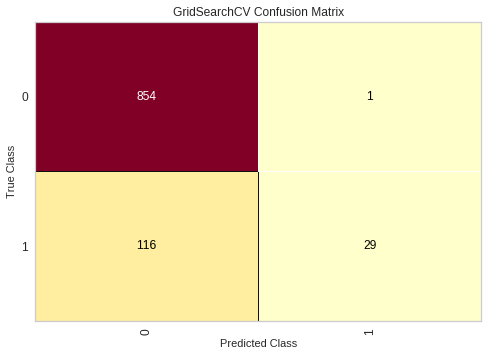

In [0]:
cm = ConfusionMatrix(svm_cv, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

###Classfication report

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       855
           1       0.97      0.20      0.33       145

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.92      0.60      0.63      1000
weighted avg       0.89      0.88      0.85      1000



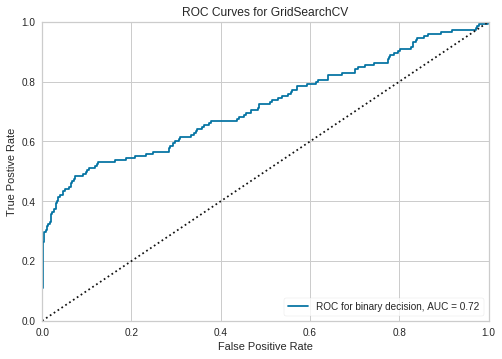

In [0]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(svm_cv, micro=False, macro=False, per_class=False)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

###Performance Interpretation 

* Using SVM, the best model achieves 88.3% accuracy.
* Here, recall =  0.2. The model can identify 20% churning customers correctly. This model is better than Logistics Regression, but still very bad.

##Model 3: Random Forest

###Default model result

In [0]:
rfc=RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.914

### Set up hyperparameter grid

In [0]:
param_grid = {'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(3,10),
    'min_samples_leaf': np.arange(2,8),
    'criterion' :['gini', 'entropy']}

### GridSearch for best parameters

In [0]:
rfc=RandomForestClassifier(random_state=1)
rfc_cv = RandomizedSearchCV(rfc, param_grid, cv=10)
rfc_cv.fit(X_train, y_train)
rfc_cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'n_estimators': 500}

###Use the best parameters to predict

In [0]:
y_pred = rfc_cv.predict(X_test)
rfc_cv.score(X_test,y_test)

0.922

###Confusion matrix

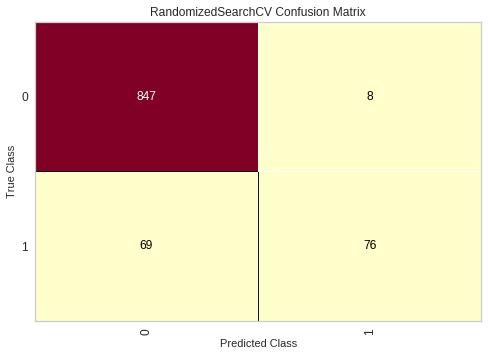

In [0]:
cm = ConfusionMatrix(rfc_cv, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

###Classfication report

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       855
           1       0.89      0.51      0.65       145

   micro avg       0.92      0.92      0.92      1000
   macro avg       0.91      0.75      0.80      1000
weighted avg       0.92      0.92      0.91      1000



###ROC AUC

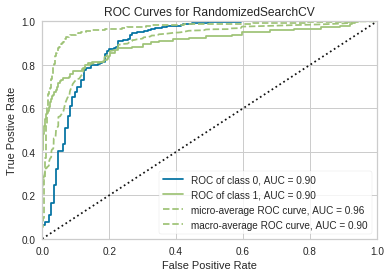

In [0]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(rfc_cv)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

###Performance Interpretation 

* Using SVM, the best model achieves 92.2% accuracy.
* Here, recall =  0.51. The model can identify 51% churning customers correctly. This model is better than Logistics Regression and SVM, but not much better than random guess.

#Deployment

###Use Correlation Heatmap to explore key factors

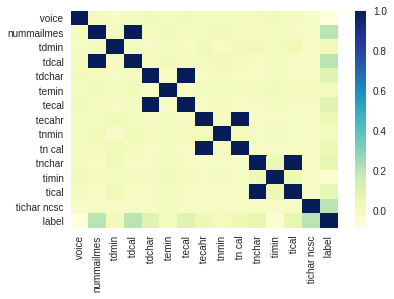

In [0]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            cmap='YlGnBu')

The heatmap shows that nummailmes, tdcal and tichar ncsc are three most important factors.

###Use the best model to identify key factors

In [0]:
best_model = RandomForestClassifier(criterion='gini', max_depth=7, max_features='log2', min_samples_leaf=2, n_estimators=500, random_state=1)
model = best_model.fit(X_train,y_train)
list(zip(X,model.feature_importances_))

[(' voice', 0.05200039472756198),
 ('nummailmes', 0.20103519382155605),
 (' tdmin', 0.03245782284106871),
 (' tdcal', 0.18836906253932845),
 (' tdchar', 0.07933594340417963),
 (' temin', 0.024756276603721147),
 (' tecal', 0.0795547529104034),
 (' tecahr', 0.03290496416826866),
 (' tnmin', 0.026387752362796797),
 (' tn cal', 0.033313848365986144),
 (' tnchar', 0.037104465133636695),
 (' timin', 0.024423070972282718),
 (' tical', 0.03633709435459314),
 (' tichar ncsc', 0.15201935779461637)]

The feature importance from the model also shows that nummailmes, tdcal and tichar ncsc are three most important factors.

###Explore these three factors through visualization

####Number of Email Messages vs Customer Churn

In [0]:
churn=df.loc[:,' label']==1
loyal=df.loc[:,' label']==0
df[churn].head()

,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar ncsc,label
IN,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
NY,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
CO,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
AZ,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,1
MD,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,1


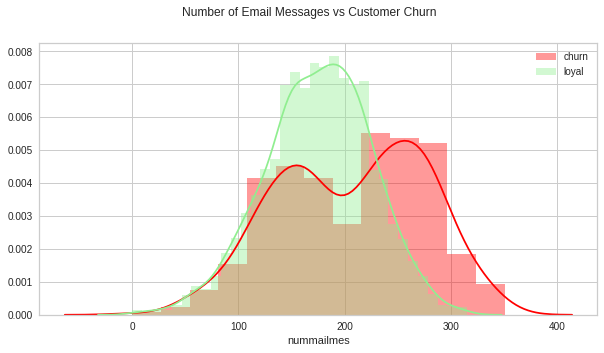

In [0]:
plt.subplots(figsize =(10, 5)) 
sns.distplot(df[churn]['nummailmes'] , color='red', label='churn')
sns.distplot(df[loyal]['nummailmes'] , color='lightgreen', label='loyal')
plt.suptitle('Number of Email Messages vs Customer Churn')
plt.legend()
plt.show()

#### Total Day Calls vs Customer Churn

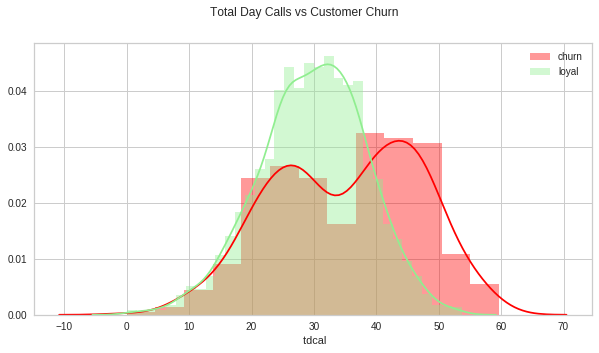

In [0]:
plt.subplots(figsize =(10, 5)) 
sns.distplot(df[churn][' tdcal'] , color='red', label='churn')
sns.distplot(df[loyal][' tdcal'] , color='lightgreen', label='loyal')
plt.suptitle('Total Day Calls vs Customer Churn')
plt.legend()
plt.show()

####Total International Charge vs Customer Churn

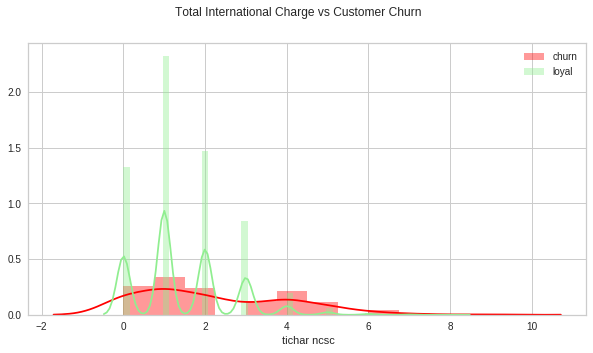

In [0]:
plt.subplots(figsize =(10, 5)) 
sns.distplot(df[churn][' tichar ncsc'] , color='red', label='churn')
sns.distplot(df[loyal][' tichar ncsc'] , color='lightgreen', label='loyal')
plt.suptitle('Total International Charge vs Customer Churn')
plt.legend()
plt.show()

#Conclusion

* In this project, we build classification machine learning models in Python for customer churn prediction.
* Four classification models are evaluated in terms of accuracy, precision and recall. 
* From business impact viewpoint, we choose recall as the most important metric. 
* The modeling and evaluation results show that Random Forest performs better than Logistic Regression and SVM in terms of recall.
* Using this best model, we identify three important factors: Number of Email Messages, Total Day Calls, and Total International Charge.
* Through data exploration and visualization, it is suggested that customers sending more email messages, giving more day calls and having higher international charge are more likely to churn.
* Recommendations:
   1.   It is very likely that customers who want to churn increase usage by sending more email messages and giving more day calls before the packages expired. Therefore, the company should frequently monitor customer usage data, especially on Number of Email Messages and Total Day Calls, and use the best model to identify who is likely to churn. Then the company can retain customers by giving customized packages.
   2.   Customer churn is also positively correlated with Total International Charge. Thus, lowering the price when the customer is likely to churn is another way to retain customers and build customer relationship.
